In [3]:
import talib as ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import mplfinance as mpf
import yfinance as yf
from myTA import downloadAndMakeAnalysis, makeAnalysis, plotAnalysis, Portfolio, Trade, calculateProfit, TradingStrategies

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


score: $-98.0450129699704


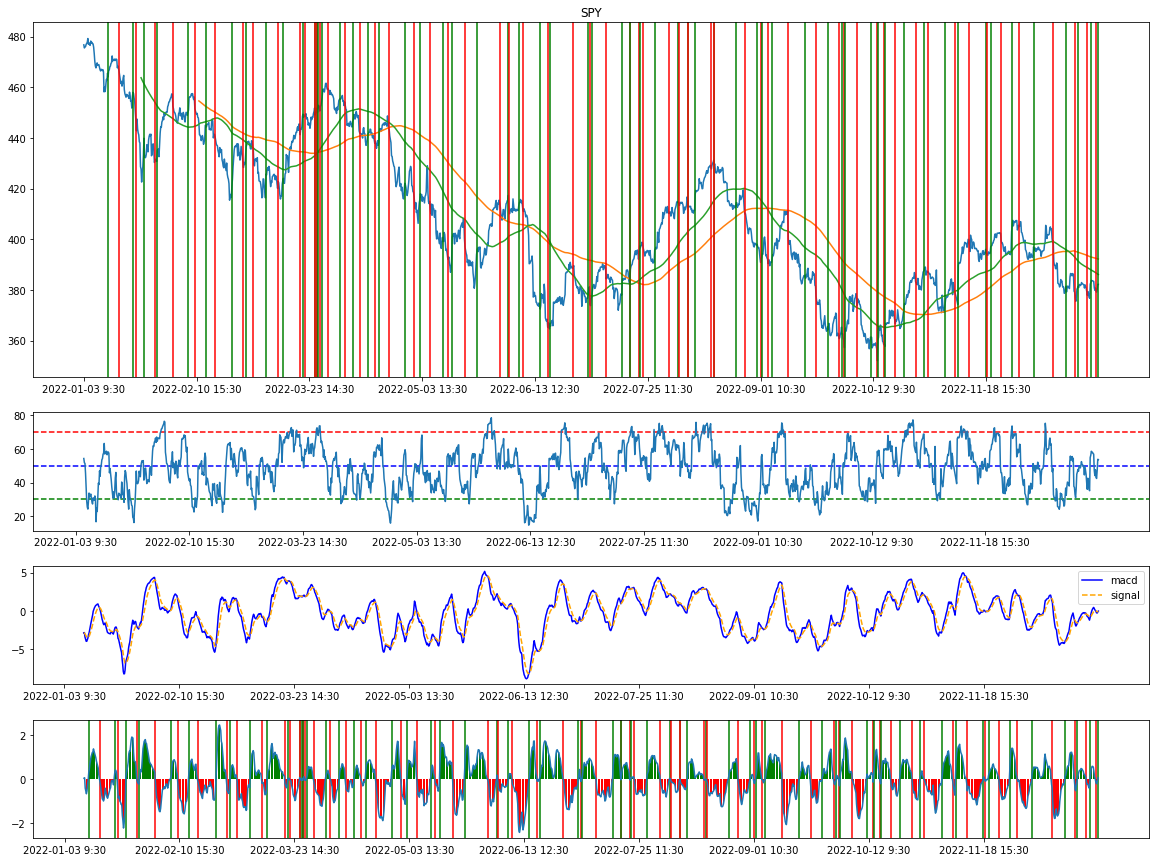

In [2]:
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()
interval = '1h'
ticker_code = 'SPY'
data = downloadAndMakeAnalysis(ticker_code, start, end, interval=interval)
tradesList = TradingStrategies.simpleMACD(data)

plotAnalysis(data, ticker_code, tradesList)

print( f"score: ${calculateProfit(tradesList, 0.001)}")

# Prediction
* macd at zero
* macd at the top

# Features
* SMA
* days from previous 0 crossing
* previous values
* RSI
* stock price?

# Data

change

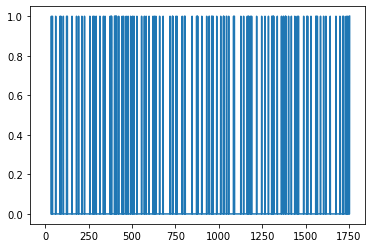

In [3]:
changes = np.abs(np.concatenate([[0],np.diff(data['macd_hist_greaterThanZero'])]))
plt.plot(changes)

last values

In [4]:
dataTrain = data.reset_index()
X_train, y_train = [], []

for i in range(50,len(dataTrain)-200):
    X_train.append(dataTrain.loc[i-4:i-1,'macd_hist'].values)
    y_train.append(dataTrain.loc[i,'macd_hist'])
X_Test, y_Test = [], []
for i in range(len(dataTrain)-200, len(dataTrain)):
    X_Test.append(dataTrain.loc[i-4:i-1,'macd_hist'].values)
    y_Test.append(dataTrain.loc[i,'macd_hist'])

model

In [101]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(X_train), np.array(y_train))
y_pred = model.predict(np.array(X_Test))

In [113]:
model.predict(np.array([X_Test[0]]))

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [107]:
X_Test[0]

array([-0.57771032, -0.34651742, -0.07904558,  0.19860041])

In [102]:
model.coef_

array([-0.07014845,  0.06866184, -0.65870416,  1.58685211])

In [105]:
model.coef_ = np.array([1,  0.06866184, -0.65870416,  1.58685211])

In [110]:
model = LinearRegression()
model.coef_ = np.array([1,  0.06866184, -0.65870416,  1.58685211])

In [111]:
model.predict([np.array([1,1,1,1])])

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [33]:
import talib as ta

for i in range(34,40):
    macd = ta.MACD(data['Close'][i-34:i])
    data.loc[data.index[i],'macd'], data.loc[data.index[i],'macd_signal'], data.loc[data.index[i],'macd_hist'] = macd[0][-1], macd[1][-1], macd[2][-1]

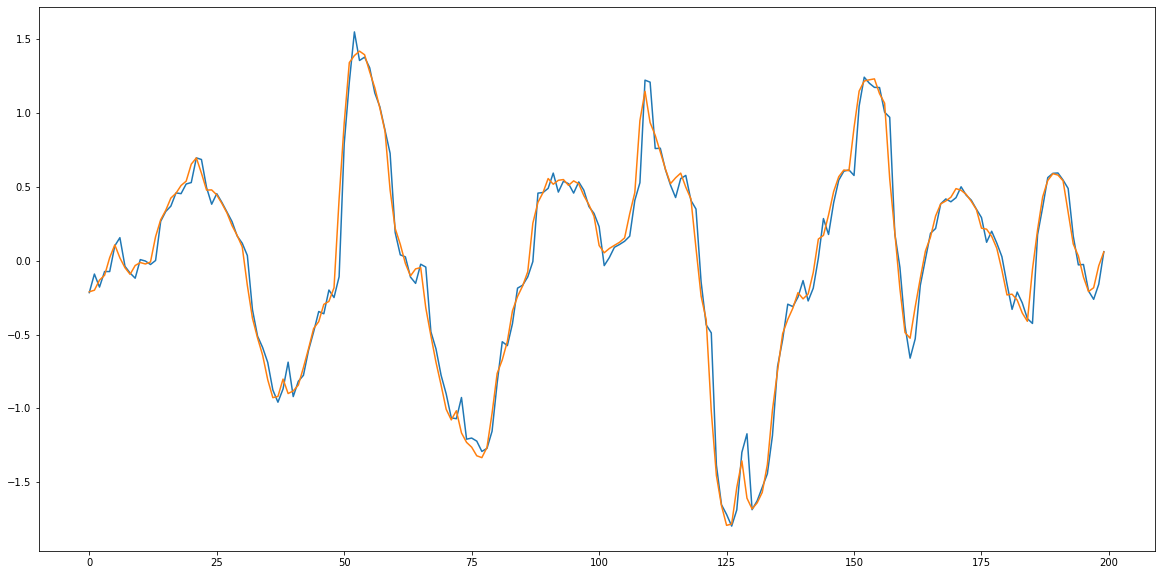

In [32]:
plt.figure(figsize=(20,10))
plt.plot(y_pred)
plt.plot(y_Test)

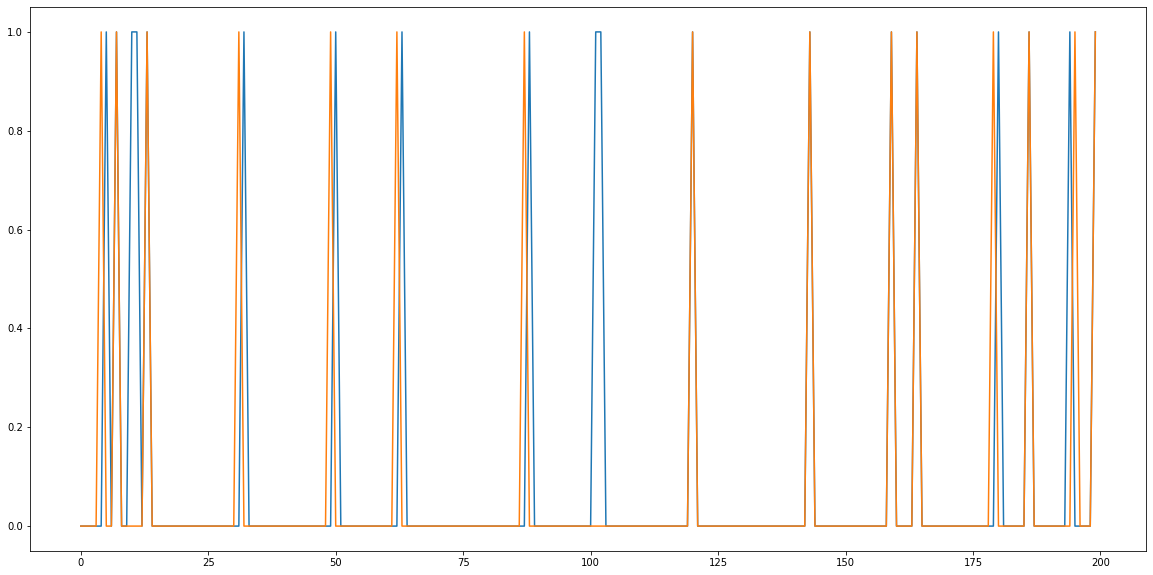

In [19]:
plt.figure(figsize=(20,10))
changesPreds = np.abs(np.concatenate([[0],np.diff(y_pred > 0)]))
plt.plot(changesPreds)
changesReal = np.abs(np.concatenate([[0],np.diff(np.array(y_Test) > 0)]))
plt.plot(changesReal)

In [26]:
def MeanDaysOffset(y_hat, yReal):
    changesPreds = np.abs(np.concatenate([[0],np.diff(np.array(y_hat) > 0)]))
    changesReal = np.abs(np.concatenate([[0],np.diff(np.array(yReal) > 0)]))
    changeIndexesPreds = np.array([i for i in range(len(y_hat)) if changesPreds[i] == 1])
    changeIndexesReal = np.array([i for i in range(len(yReal)) if changesReal[i] == 1])

    val = []
    for i in range(len(changeIndexesPreds)):
        val.append(np.min(np.abs(changeIndexesReal - changeIndexesPreds[i])))
    return np.mean(val)

In [23]:
changesPreds = np.abs(np.concatenate([[0],np.diff(np.array(y_pred) > 0)]))
changesReal = np.abs(np.concatenate([[0],np.diff(np.array(y_Test) > 0)]))
changeIndexesPreds = np.array([i for i in range(len(y_pred)) if changesPreds[i] == 1])
changeIndexesReal = np.array([i for i in range(len(y_Test)) if changesReal[i] == 1])

val = []
for i in range(len(changeIndexesPreds)):
    val.append(np.min(np.abs(changeIndexesReal - changeIndexesPreds[i])))
np.mean(val)

2.1578947368421053

In [28]:
MeanDaysOffset(y_pred, y_Test)

2.1578947368421053

In [22]:
changesPreds = np.abs(np.concatenate([[0],np.diff(np.array(y_pred) > 0)]))
changesReal = np.abs(np.concatenate([[0],np.diff(np.array(y_Test) > 0)]))
changeIndexesPreds = np.array([i for i in range(len(y_pred)) if changesPreds[i] == 1])
changeIndexesReal = np.array([i for i in range(len(y_Test)) if changesReal[i] == 1])

val = []
for i in range(len(changeIndexesPreds)):
    val.append(np.min(np.abs(changeIndexesReal - changeIndexesPreds[i])))
np.mean(val)

2.1578947368421053

In [13]:
import xgboost as xgb

In [34]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_Test)
MeanDaysOffset(y_pred, y_Test)

2.3333333333333335

# Testing

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()

tickers = pd.read_csv("tickers.csv")
coefs = []
loss = []

for i in range(100):
    try:
        data = downloadAndMakeAnalysis(tickers['ACT Symbol'][i], start, end, interval='1d')
        dataTrain = data.reset_index()
        X_train, y_train = [], []

        for i in range(50,len(dataTrain)-200):
            X_train.append(dataTrain.loc[i-4:i-1,'macd_hist'].values)
            y_train.append(dataTrain.loc[i,'macd_hist'])
        X_Test, y_Test = [], []
        for i in range(len(dataTrain)-200, len(dataTrain)):
            X_Test.append(dataTrain.loc[i-4:i-1,'macd_hist'].values)
            y_Test.append(dataTrain.loc[i,'macd_hist'])
        model.fit(X_train, y_train)
        coefs.append(model.coef_)
        y_pred = model.predict(X_Test)
        loss.append(MeanDaysOffset(y_pred, y_Test))
    except:
        pass


1 Failed download:
- AAV: No data found for this date range, symbol may be delisted

1 Failed download:
- ABRN: No data found, symbol may be delisted

1 Failed download:
- ABX: No data found for this date range, symbol may be delisted

1 Failed download:
- ACC: No data found, symbol may be delisted

1 Failed download:
- ACH: No data found, symbol may be delisted

1 Failed download:
- ACMP: No data found for this date range, symbol may be delisted

1 Failed download:
- ACW: No data found for this date range, symbol may be delisted

1 Failed download:
- ADS: No data found, symbol may be delisted

1 Failed download:
- AEC: No data found for this date range, symbol may be delisted

1 Failed download:
- AED: No data found for this date range, symbol may be delisted

1 Failed download:
- AEH: No data found for this date range, symbol may be delisted

1 Failed download:
- AEK: No data found, symbol may be delisted

1 Failed download:
- AET: No data found for this date range, symbol may be de

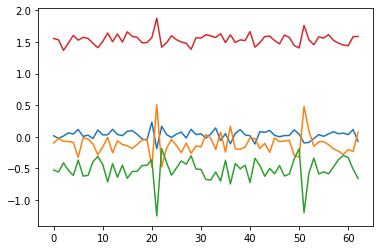

In [62]:
plt.plot(coefs)

1.667379391870495

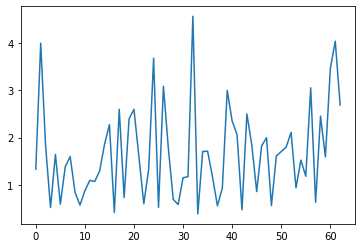

In [63]:
plt.plot(loss)
np.mean(loss)

2.040972421135256

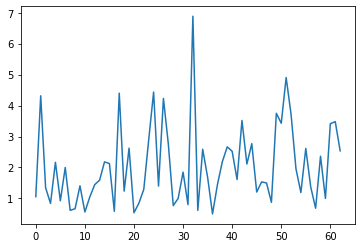

In [65]:
plt.plot(loss)
np.mean(loss)

In [64]:
from sklearn.linear_model import LinearRegression

model = xgb.XGBRegressor()
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()

tickers = pd.read_csv("tickers.csv")
coefs = []
loss = []

for i in range(100):
    try:
        data = downloadAndMakeAnalysis(tickers['ACT Symbol'][i], start, end, interval='1d')
        dataTrain = data.reset_index()
        X_train, y_train = [], []

        for i in range(50,len(dataTrain)-200):
            X_train.append(dataTrain.loc[i-4:i-1,'macd_hist'].values)
            y_train.append(dataTrain.loc[i,'macd_hist'])
        X_Test, y_Test = [], []
        for i in range(len(dataTrain)-200, len(dataTrain)):
            X_Test.append(dataTrain.loc[i-4:i-1,'macd_hist'].values)
            y_Test.append(dataTrain.loc[i,'macd_hist'])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_Test)
        loss.append(MeanDaysOffset(y_pred, y_Test))
    except:
        pass


1 Failed download:
- AAV: No data found for this date range, symbol may be delisted

1 Failed download:
- ABRN: No data found, symbol may be delisted

1 Failed download:
- ABX: No data found for this date range, symbol may be delisted

1 Failed download:
- ACC: No data found, symbol may be delisted

1 Failed download:
- ACH: No data found, symbol may be delisted

1 Failed download:
- ACMP: No data found for this date range, symbol may be delisted

1 Failed download:
- ACW: No data found for this date range, symbol may be delisted

1 Failed download:
- ADS: No data found, symbol may be delisted

1 Failed download:
- AEC: No data found for this date range, symbol may be delisted

1 Failed download:
- AED: No data found for this date range, symbol may be delisted

1 Failed download:
- AEH: No data found for this date range, symbol may be delisted

1 Failed download:
- AEK: No data found, symbol may be delisted

1 Failed download:
- AET: No data found for this date range, symbol may be de

# Simple curve/straight fit

In [4]:
code = "USDPLN=X"
data = downloadAndMakeAnalysis(code, dt.datetime(2022,12,25), dt.datetime.now(),'1h')
line = data['macd_hist']

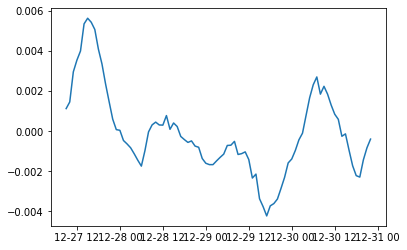

In [6]:
plt.plot(line)

In [25]:
np.concatenate([currData, [pred]])

array([0.00542289, 0.00506127, 0.00408302, 0.00334358, 0.00265048])

In [22]:
currData

array([0.00542289, 0.00506127, 0.00408302, 0.00334358])

In [23]:
pred

0.002650479571629442

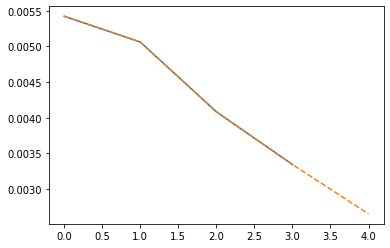

In [26]:
i = 40
window = 4
currData = line[i:i+window].values

meanDiff = np.mean(np.diff(currData))

plt.plot(currData)

pred = currData[-1]+meanDiff

plt.plot(np.concatenate([currData, [pred]]),'--')


In [27]:
def predictLinear(currData):
    meanDiff = np.mean(np.diff(currData))
    return currData[-1]+meanDiff

In [36]:
i = 40
window = 4
preds = []

for i in range(40,100):
    currData = line[i-window:i].values
    preds.append(predictLinear(currData))

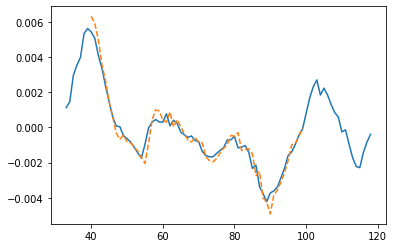

In [38]:
plt.plot(line.values)
plt.plot(np.arange(40,len(preds)+40),preds,'--')